In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [172]:
a = pd.read_csv('/content/drive/MyDrive/tips (data for regression problem).csv')
a.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


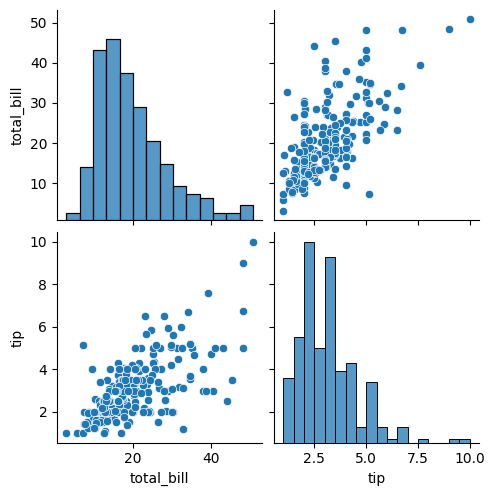

In [128]:
# pair plot
sns.pairplot(a, vars=['total_bill', 'tip'])
plt.show()

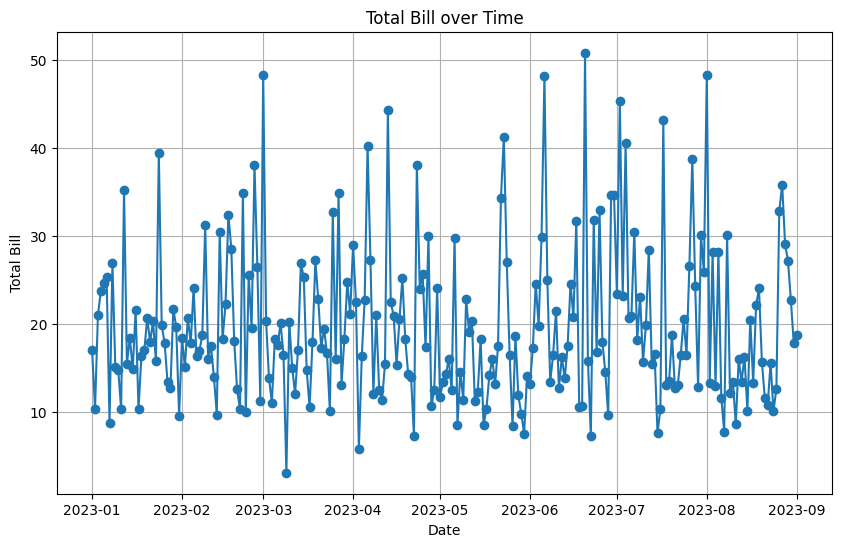

In [162]:
a['time_index'] = pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(a), freq='D')) # Add dummy time index

plt.figure(figsize=(10, 6))
plt.plot(a['time_index'], a['total_bill'], marker='o', linestyle='-')
plt.title('Total Bill over Time')
plt.xlabel('Date')
plt.ylabel('Total Bill')
plt.grid(True)
plt.show()

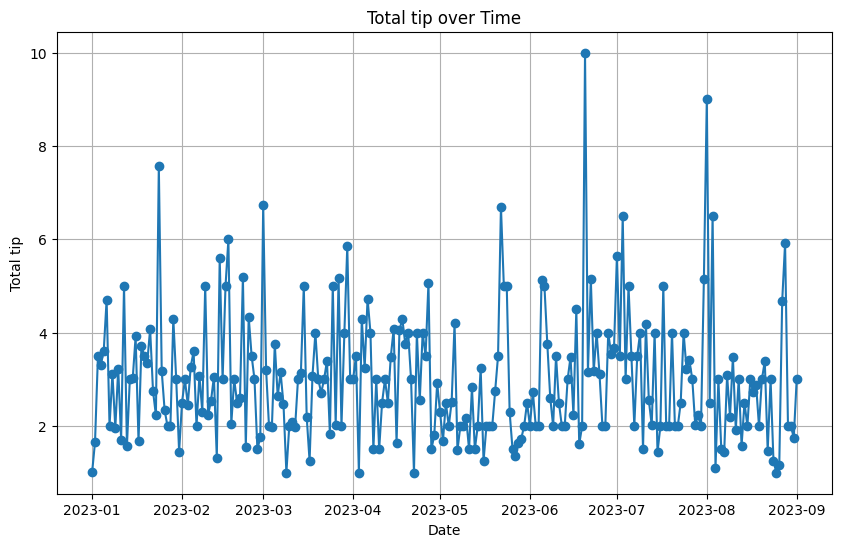

In [163]:
a['time_index'] = pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(a), freq='D')) # Add dummy time index

plt.figure(figsize=(10, 6))
plt.plot(a['time_index'], a['tip'], marker='o', linestyle='-')
plt.title('Total tip over Time')
plt.xlabel('Date')
plt.ylabel('Total tip')
plt.grid(True)
plt.show()

In [173]:
a = pd.get_dummies(a, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
a.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [174]:
b = ['sex_Male',	'smoker_Yes',	'day_Sat',	'day_Sun',	'day_Thur',	'time_Lunch']

In [175]:
a[b] = a[b].astype(int)

In [176]:
a.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


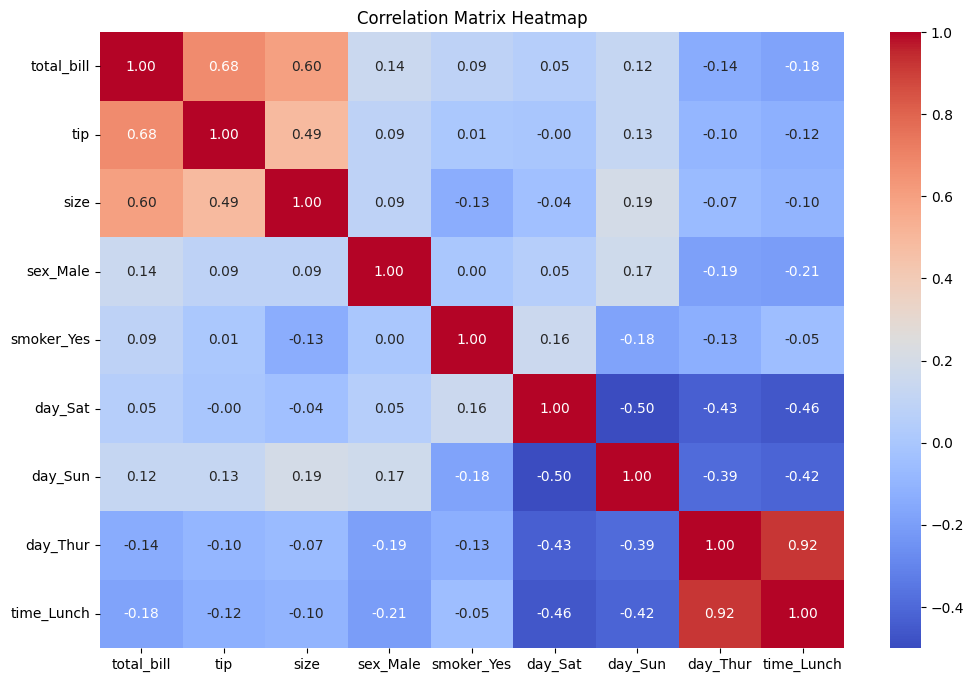

In [177]:
correlation_matrix = a.corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
X = a.drop('tip', axis=1)
y = a['tip']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
l1 = LinearRegression()
l1.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred1 = l1.predict(X_test)

In [11]:
r2_score(y_test, y_pred1)

0.43730181943482493

In [12]:
r1 = Ridge(alpha = 1)
r1.fit(X_train, y_train)

Ridge(alpha=1)

In [13]:
y_pred2 = r1.predict(X_test)

In [14]:
r2_score(y_test, y_pred2)

0.4393889716178484

In [15]:
l2 = Lasso(alpha = 0.01)
l2.fit(X_train, y_train)

Lasso(alpha=0.01)

In [16]:
y_pred3 = l2.predict(X_test)

In [17]:
r2_score(y_test, y_pred3)

0.45668627024964514

In [18]:
d1 = DecisionTreeRegressor(random_state = 0)
d1.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [19]:
y_pred4 = d1.predict(X_test)

In [20]:
r2_score(y_test, y_pred4)

0.07170769962173551

In [21]:
f1 = RandomForestRegressor(n_estimators =100, random_state = 0)
f1.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [22]:
y_pred5 = f1.predict(X_test)

In [23]:
r2_score(y_test, y_pred5)

0.30510316356106615

In [24]:
sc_X = StandardScaler()
sc_y = StandardScaler()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predictions
y_pred6 = svr_reg.predict(X_test)

# Evaluation
r2_score(y_test, y_pred6)

0.5740891915042663

In [25]:
k1 = KNeighborsRegressor(n_neighbors=5)
k1.fit(X_train, y_train)
y_pred7 = k1.predict(X_test)
r2_score(y_test, y_pred7)

0.29888587066985495

In [132]:
X = a[['total_bill']]
y = a['tip']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
l1 = LinearRegression()
l1.fit(X_train, y_train)
y_pred1 = l1.predict(X_test)
r2_score(y_test, y_pred1)

0.5449381659234664

In [158]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'l1' is your fitted LinearRegression model
# and 'X' and 'y' are your predictor and response variables

# Create a statsmodels OLS object
l1 = sm.OLS(y, X).fit()

# Perform the Rainbow Test
fstat, pvalue = sm.stats.diagnostic.linear_rainbow(l1)

# Print the results
print(f"Rainbow Test - F-statistic: {fstat:.2f}, p-value: {pvalue:.3f}")

# Interpret the results
if pvalue < 0.05:
    print("The Rainbow Test suggests nonlinearity.")
else:
    print("The Rainbow Test does not suggest nonlinearity.")

Rainbow Test - F-statistic: 1.14, p-value: 0.236
The Rainbow Test does not suggest nonlinearity.


In [135]:
r1 = Ridge(alpha = 1)
r1.fit(X_train, y_train)
y_pred2 = r1.predict(X_test)
r2_score(y_test, y_pred2)

0.5449458342338539

In [136]:
l2 = Lasso(alpha = 0.01)
l2.fit(X_train, y_train)
y_pred3 = l2.predict(X_test)
r2_score(y_test, y_pred3)

0.545076817885791

In [159]:
d1 = DecisionTreeRegressor(random_state = 0)
d1.fit(X_train, y_train)
y_pred4 = d1.predict(X_test)
r2_score(y_test, y_pred4)

-0.06898287247700985

In [160]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming 'l1' is your fitted LinearRegression model
# and 'X' and 'y' are your predictor and response variables

# Create a statsmodels OLS object
d1 = sm.OLS(y, X).fit()

# Perform the Rainbow Test
fstat, pvalue = sm.stats.diagnostic.linear_rainbow(d1)

# Print the results
print(f"Rainbow Test - F-statistic: {fstat:.2f}, p-value: {pvalue:.3f}")

# Interpret the results
if pvalue < 0.05:
    print("The Rainbow Test suggests nonlinearity.")
else:
    print("The Rainbow Test does not suggest nonlinearity.")

Rainbow Test - F-statistic: 1.14, p-value: 0.236
The Rainbow Test does not suggest nonlinearity.


In [138]:
f1 = RandomForestRegressor(n_estimators =100, random_state = 0)
f1.fit(X_train, y_train)
y_pred5 = f1.predict(X_test)
r2_score(y_test, y_pred5)

0.21349875048162892

In [139]:
sc_X = StandardScaler()
sc_y = StandardScaler()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predictions
y_pred6 = svr_reg.predict(X_test)

# Evaluation
r2_score(y_test, y_pred6)

0.5125471659009395

In [140]:
k1 = KNeighborsRegressor(n_neighbors=5)
k1.fit(X_train, y_train)
y_pred7 = k1.predict(X_test)
r2_score(y_test, y_pred7)

0.4545453410143979

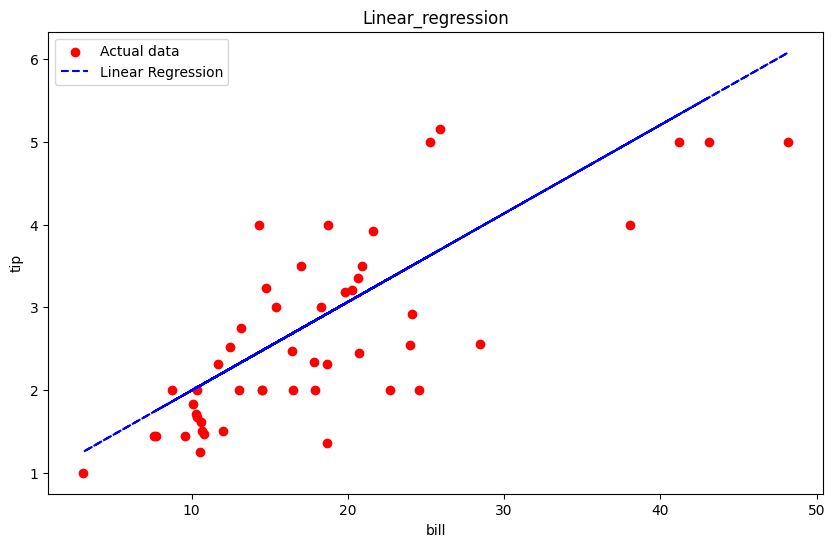

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')

plt.plot(X_test, y_pred1, color='blue', label='Linear Regression', linestyle='--')

plt.title('Linear_regression')
plt.xlabel('bill')
plt.ylabel('tip')
plt.legend()
plt.show()

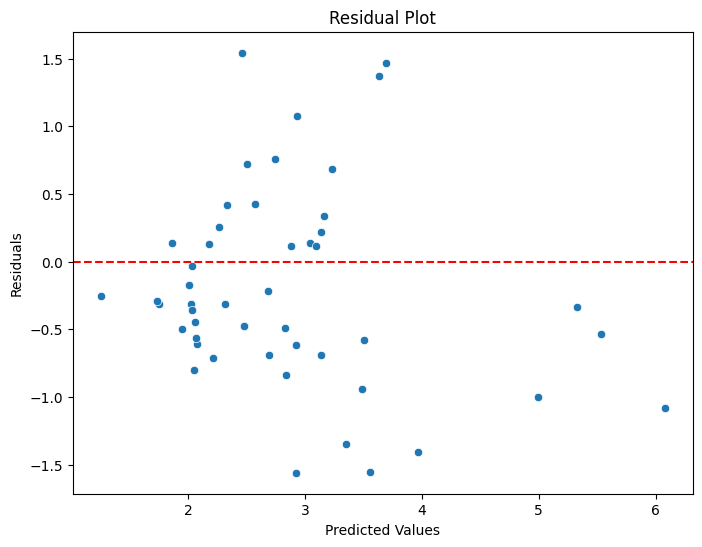

In [148]:
residuals = y_test - y_pred1

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred1, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Linear_regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

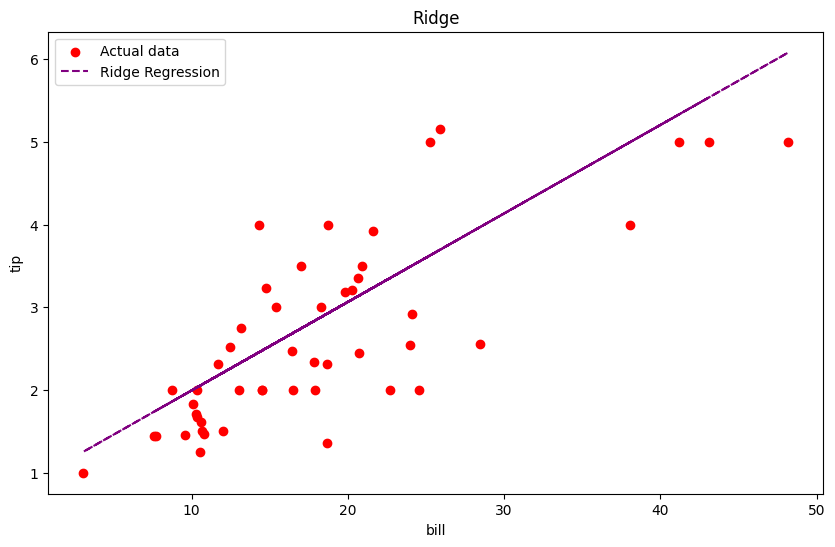

In [142]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')
plt.plot(X_test, y_pred2, color='purple', label='Ridge Regression', linestyle='--')
plt.title('Ridge')
plt.xlabel('bill')
plt.ylabel('tip')
plt.legend()
plt.show()

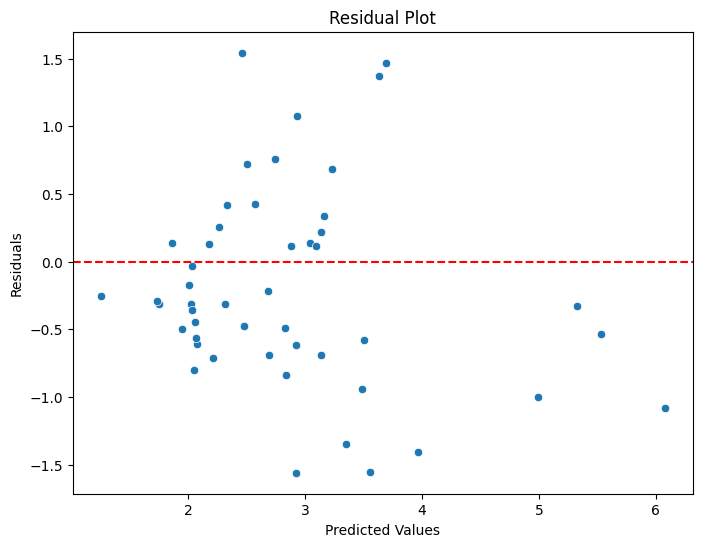

In [149]:
residuals = y_test - y_pred2

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred2, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Ridge')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

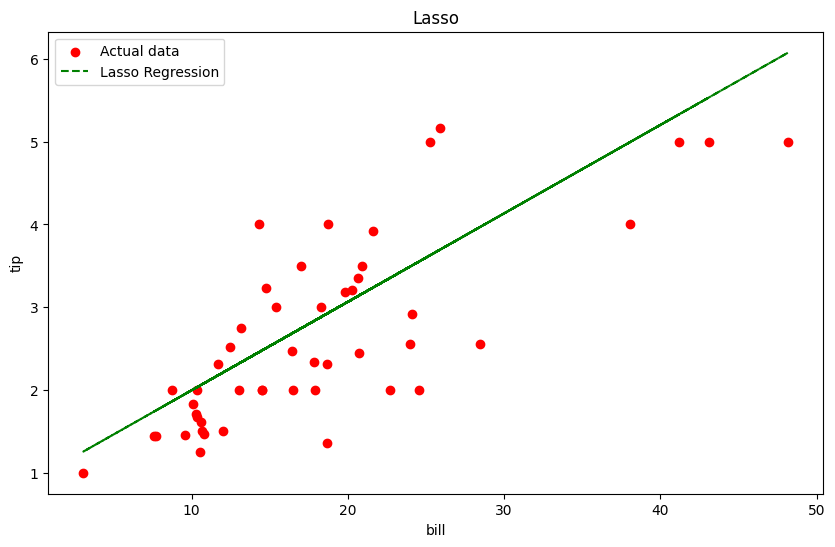

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')
plt.plot(X_test, y_pred3, color='green', label='Lasso Regression', linestyle='--')
plt.title('Lasso')
plt.xlabel('bill')
plt.ylabel('tip')
plt.legend()
plt.show()

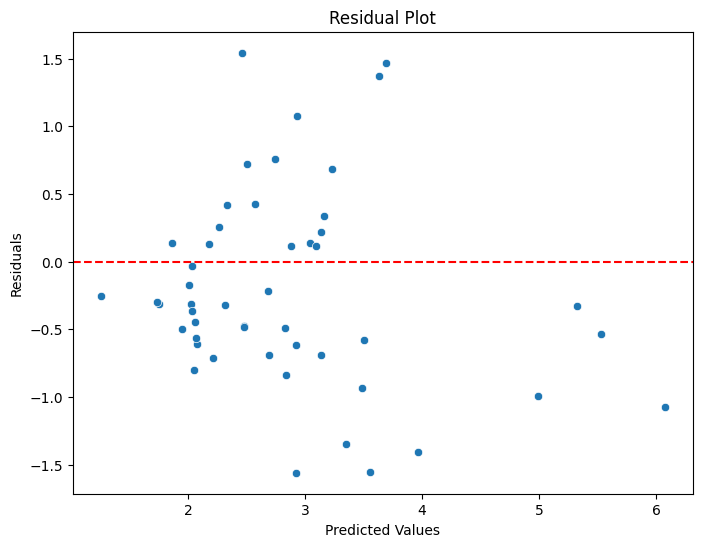

In [150]:
residuals = y_test - y_pred3

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred3, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Lasso')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

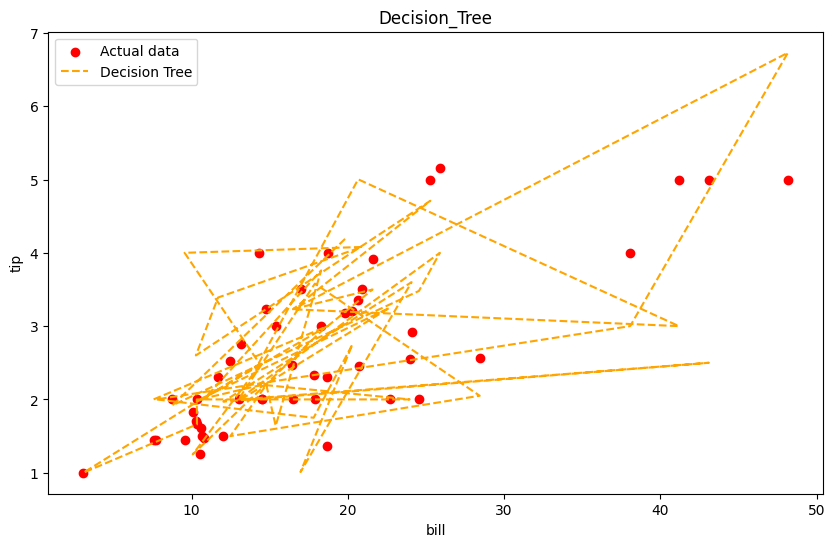

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')
plt.plot(X_test, y_pred4, color='orange', label='Decision Tree', linestyle='--')
plt.title('Decision_Tree')
plt.xlabel('bill')
plt.ylabel('tip')
plt.legend()
plt.show()

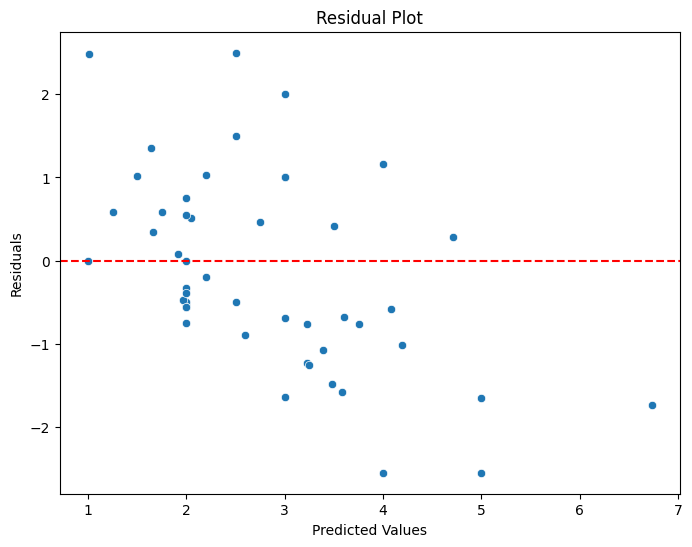

In [151]:
residuals = y_test - y_pred4

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred4, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Decision_tree')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

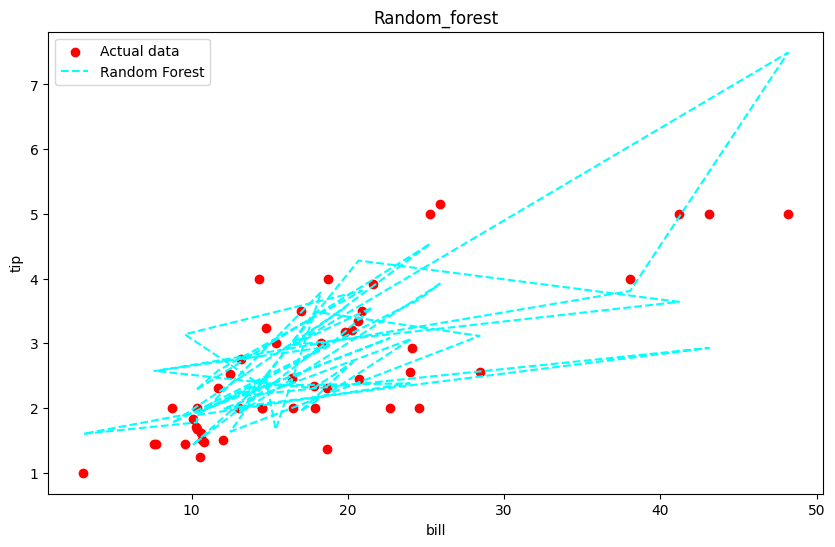

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')
plt.plot(X_test, y_pred5, color='cyan', label='Random Forest', linestyle='--')
plt.title('Random_forest')
plt.xlabel('bill')
plt.ylabel('tip')
plt.legend()
plt.show()

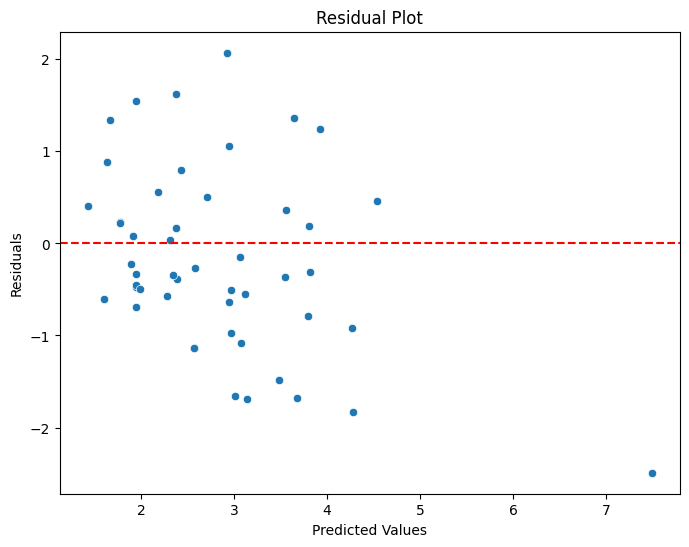

In [152]:
residuals = y_test - y_pred5

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred5, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Random_forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

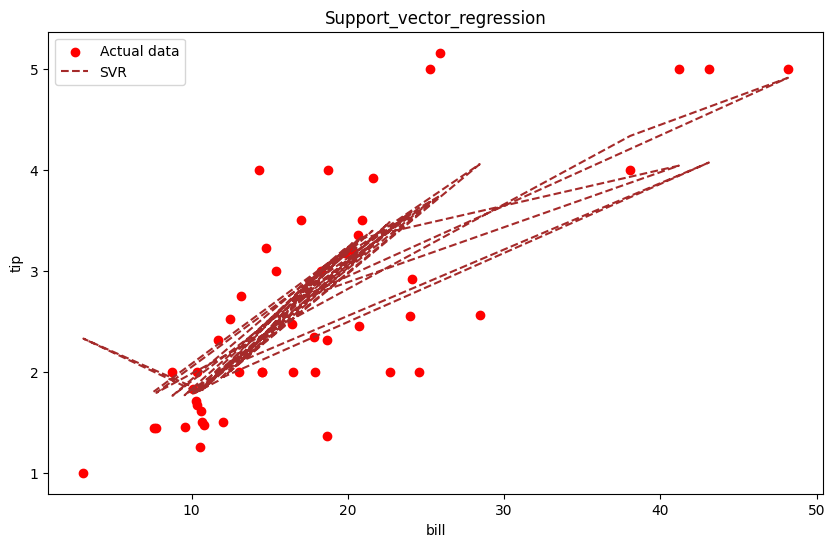

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')
plt.plot(X_test, y_pred6, color='brown', label='SVR', linestyle='--')
plt.title('Support_vector_regression')
plt.xlabel('bill')
plt.ylabel('tip')
plt.legend()
plt.show()

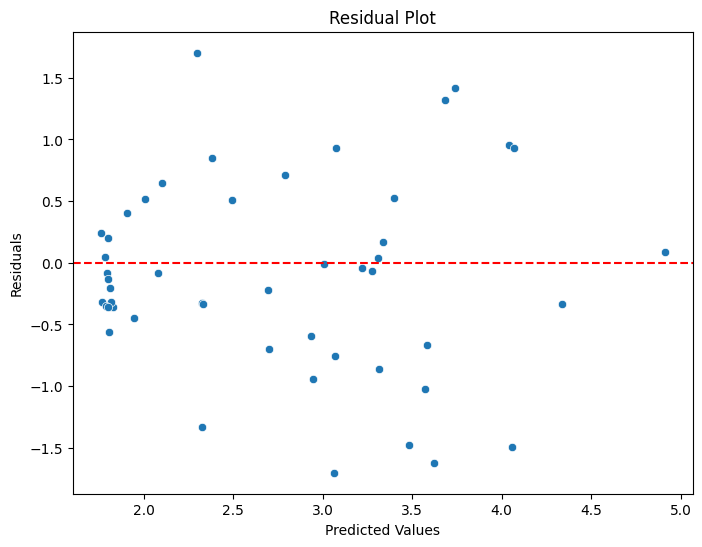

In [153]:
residuals = y_test - y_pred6

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred6, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Support_vector_regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

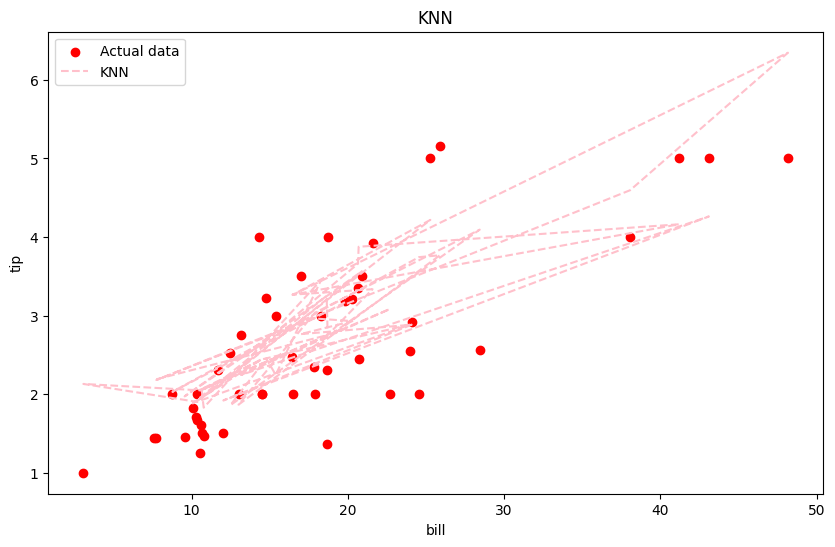

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual data')
plt.plot(X_test, y_pred7, color='pink', label='KNN', linestyle='--')
plt.title('KNN')
plt.xlabel('bill')
plt.ylabel('tip')
plt.legend()
plt.show()

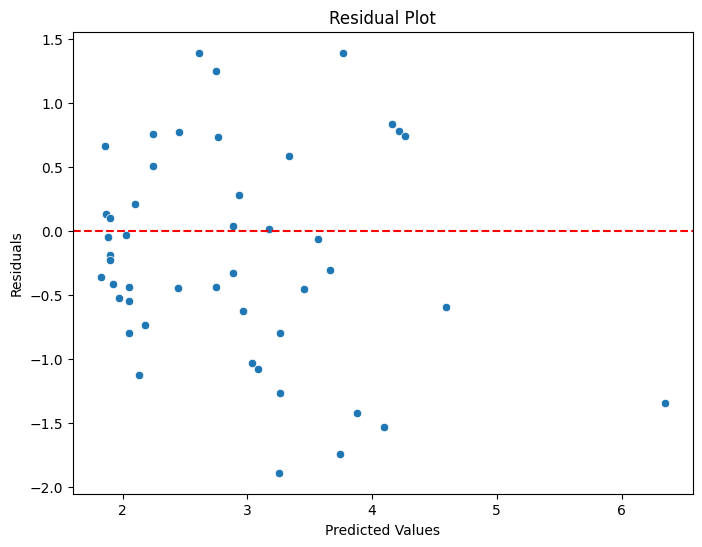

In [154]:
residuals = y_test - y_pred7

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred7, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('KNN')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [166]:
a = a.drop(['sex', 'smoker', 'day', 'time'], axis = 1)
a.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


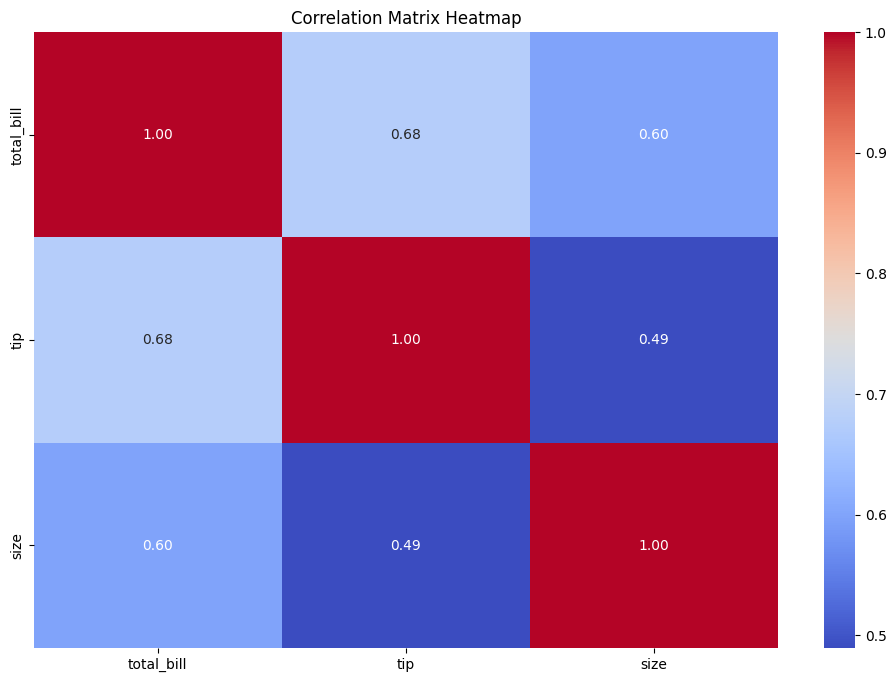

In [167]:
correlation_matrix = a.corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [41]:
X = a.drop('tip', axis=1)
y = a['tip']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
l1 = LinearRegression()
l1.fit(X_train, y_train)
y_pred1 = l1.predict(X_test)
r2_score(y_test, y_pred1)

0.4811084097989491

In [44]:
r1 = Ridge(alpha = 1)
r1.fit(X_train, y_train)
y_pred2 = r1.predict(X_test)
r2_score(y_test, y_pred2)

0.4818828773627838

In [45]:
l2 = Lasso(alpha = 0.01)
l2.fit(X_train, y_train)
y_pred3 = l2.predict(X_test)
r2_score(y_test, y_pred3)

0.486671361002488

In [46]:
d1 = DecisionTreeRegressor(random_state = 0)
d1.fit(X_train, y_train)
y_pred4 = d1.predict(X_test)
r2_score(y_test, y_pred4)

0.18075183197868894

In [47]:
f1 = RandomForestRegressor(n_estimators =100, random_state = 0)
f1.fit(X_train, y_train)
y_pred5 = f1.predict(X_test)
r2_score(y_test, y_pred5)

0.3498370231164679

In [48]:
sc_X = StandardScaler()
sc_y = StandardScaler()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predictions
y_pred6 = svr_reg.predict(X_test)

# Evaluation
r2_score(y_test, y_pred6)

0.572196812715273

In [49]:
k1 = KNeighborsRegressor(n_neighbors=5)
k1.fit(X_train, y_train)
y_pred7 = k1.predict(X_test)
r2_score(y_test, y_pred7)

0.40844253722501

In [51]:
a = a.drop(['sex', 'smoker', 'day'], axis = 1)
a.head()

,total_bill,tip,time,size
0,16.99,1.01,Dinner,2
1,10.34,1.66,Dinner,3
2,21.01,3.50,Dinner,3
3,23.68,3.31,Dinner,2
4,24.59,3.61,Dinner,4


In [52]:
a = pd.get_dummies(a, columns=['time'], drop_first=True)
a.head()

,total_bill,tip,size,time_Lunch
0,16.99,1.01,2,False
1,10.34,1.66,3,False
2,21.01,3.50,3,False
3,23.68,3.31,2,False
4,24.59,3.61,4,False


In [55]:
b = ['time_Lunch']

In [56]:
a[b] = a[b].astype(int)

In [57]:
a.head()

,total_bill,tip,size,time_Lunch
0,16.99,1.01,2,0
1,10.34,1.66,3,0
2,21.01,3.50,3,0
3,23.68,3.31,2,0
4,24.59,3.61,4,0


In [58]:
X = a.drop('tip', axis=1)
y = a['tip']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
l1 = LinearRegression()
l1.fit(X_train, y_train)
y_pred1 = l1.predict(X_test)
r2_score(y_test, y_pred1)

0.47722376197879446

In [61]:
r1 = Ridge(alpha = 1)
r1.fit(X_train, y_train)
y_pred2 = r1.predict(X_test)
r2_score(y_test, y_pred2)

0.47811562630029036

In [62]:
l2 = Lasso(alpha = 0.01)
l2.fit(X_train, y_train)
y_pred3 = l2.predict(X_test)
r2_score(y_test, y_pred3)

0.48667139726263486

In [63]:
d1 = DecisionTreeRegressor(random_state = 0)
d1.fit(X_train, y_train)
y_pred4 = d1.predict(X_test)
r2_score(y_test, y_pred4)

0.08568353020470743

In [64]:
f1 = RandomForestRegressor(n_estimators =100, random_state = 0)
f1.fit(X_train, y_train)
y_pred5 = f1.predict(X_test)
r2_score(y_test, y_pred5)

0.29535575861041996

In [65]:
sc_X = StandardScaler()
sc_y = StandardScaler()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predictions
y_pred6 = svr_reg.predict(X_test)

# Evaluation
r2_score(y_test, y_pred6)

0.5754341136320367

In [66]:
k1 = KNeighborsRegressor(n_neighbors=5)
k1.fit(X_train, y_train)
y_pred7 = k1.predict(X_test)
r2_score(y_test, y_pred7)

0.4346374234251502

In [68]:
a = a.drop(['time', 'smoker', 'day'], axis = 1)
a.head()

,total_bill,tip,sex,size
0,16.99,1.01,Female,2
1,10.34,1.66,Male,3
2,21.01,3.50,Male,3
3,23.68,3.31,Male,2
4,24.59,3.61,Female,4


In [69]:
a = pd.get_dummies(a, columns=['sex'], drop_first=True)
a.head()

,total_bill,tip,size,sex_Male
0,16.99,1.01,2,False
1,10.34,1.66,3,True
2,21.01,3.50,3,True
3,23.68,3.31,2,True
4,24.59,3.61,4,False


In [70]:
b = ['sex_Male']
a[b] = a[b].astype(int)
a.head()

,total_bill,tip,size,sex_Male
0,16.99,1.01,2,0
1,10.34,1.66,3,1
2,21.01,3.50,3,1
3,23.68,3.31,2,1
4,24.59,3.61,4,0


In [71]:
X = a.drop('tip', axis=1)
y = a['tip']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
l1 = LinearRegression()
l1.fit(X_train, y_train)
y_pred1 = l1.predict(X_test)
r2_score(y_test, y_pred1)

0.4792377144147403

In [74]:
r1 = Ridge(alpha = 1)
r1.fit(X_train, y_train)
y_pred2 = r1.predict(X_test)
r2_score(y_test, y_pred2)

0.4800554972620522

In [75]:
l2 = Lasso(alpha = 0.01)
l2.fit(X_train, y_train)
y_pred3 = l2.predict(X_test)
r2_score(y_test, y_pred3)

0.486671361002488

In [76]:
d1 = DecisionTreeRegressor(random_state = 0)
d1.fit(X_train, y_train)
y_pred4 = d1.predict(X_test)
r2_score(y_test, y_pred4)

0.1788987282740543

In [77]:
f1 = RandomForestRegressor(n_estimators =100, random_state = 0)
f1.fit(X_train, y_train)
y_pred5 = f1.predict(X_test)
r2_score(y_test, y_pred5)

0.35980338344708285

In [78]:
sc_X = StandardScaler()
sc_y = StandardScaler()

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predictions
y_pred6 = svr_reg.predict(X_test)

# Evaluation
r2_score(y_test, y_pred6)

0.5762362976030403

In [81]:
k1 = KNeighborsRegressor(n_neighbors=5)
k1.fit(X_train, y_train)
y_pred7 = k1.predict(X_test)
r2_score(y_test, y_pred7)

0.34925319670801613

In [83]:
a = a.drop([ 'smoker', 'day'], axis = 1)
a.head()

,total_bill,tip,sex,time,size
0,16.99,1.01,Female,Dinner,2
1,10.34,1.66,Male,Dinner,3
2,21.01,3.50,Male,Dinner,3
3,23.68,3.31,Male,Dinner,2
4,24.59,3.61,Female,Dinner,4


In [84]:
a = pd.get_dummies(a, columns=['sex', 'time'], drop_first=True)
a.head()

,total_bill,tip,size,sex_Male,time_Lunch
0,16.99,1.01,2,False,False
1,10.34,1.66,3,True,False
2,21.01,3.50,3,True,False
3,23.68,3.31,2,True,False
4,24.59,3.61,4,False,False


In [85]:
b = ['sex_Male', 'time_Lunch']
a[b] = a[b].astype(int)
a.head()

,total_bill,tip,size,sex_Male,time_Lunch
0,16.99,1.01,2,0,0
1,10.34,1.66,3,1,0
2,21.01,3.50,3,1,0
3,23.68,3.31,2,1,0
4,24.59,3.61,4,0,0


In [86]:
X = a.drop('tip', axis=1)
y = a['tip']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
l1 = LinearRegression()
l1.fit(X_train, y_train)
y_pred1 = l1.predict(X_test)
r2_score(y_test, y_pred1)

0.47439160273269143

In [89]:
r1 = Ridge(alpha = 1)
r1.fit(X_train, y_train)
y_pred2 = r1.predict(X_test)
r2_score(y_test, y_pred2)

0.4753814681981102

In [90]:
l2 = Lasso(alpha = 0.01)
l2.fit(X_train, y_train)
y_pred3 = l2.predict(X_test)
r2_score(y_test, y_pred3)

0.48667139726263486

In [91]:
d1 = DecisionTreeRegressor(random_state = 0)
d1.fit(X_train, y_train)
y_pred4 = d1.predict(X_test)
r2_score(y_test, y_pred4)

0.06986439206003292

In [92]:
f1 = RandomForestRegressor(n_estimators =100, random_state = 0)
f1.fit(X_train, y_train)
y_pred5 = f1.predict(X_test)
r2_score(y_test, y_pred5)

0.27709351136960425

In [93]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predictions
y_pred6 = svr_reg.predict(X_test)

# Evaluation
r2_score(y_test, y_pred6)

0.5766455522905004

In [94]:
k1 = KNeighborsRegressor(n_neighbors=5)
k1.fit(X_train, y_train)
y_pred7 = k1.predict(X_test)
r2_score(y_test, y_pred7)

0.3394629967694054

In [99]:
a = a.drop(['sex', 'time', 'day'], axis = 1)
a.head()

,total_bill,tip,smoker,size
0,16.99,1.01,No,2
1,10.34,1.66,No,3
2,21.01,3.50,No,3
3,23.68,3.31,No,2
4,24.59,3.61,No,4


In [100]:
a = pd.get_dummies(a, columns=['smoker'], drop_first=True)
a.head()

,total_bill,tip,size,smoker_Yes
0,16.99,1.01,2,False
1,10.34,1.66,3,False
2,21.01,3.50,3,False
3,23.68,3.31,2,False
4,24.59,3.61,4,False


In [101]:
b = ['smoker_Yes']
a[b] = a[b].astype(int)
a.head()

,total_bill,tip,size,smoker_Yes
0,16.99,1.01,2,0
1,10.34,1.66,3,0
2,21.01,3.50,3,0
3,23.68,3.31,2,0
4,24.59,3.61,4,0


In [102]:
X = a.drop('tip', axis=1)
y = a['tip']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
l1 = LinearRegression()
l1.fit(X_train, y_train)
y_pred1 = l1.predict(X_test)
r2_score(y_test, y_pred1)

0.4507089585036145

In [105]:
r1 = Ridge(alpha = 1)
r1.fit(X_train, y_train)
y_pred2 = r1.predict(X_test)
r2_score(y_test, y_pred2)

0.45212329991215405

In [106]:
l2 = Lasso(alpha = 0.01)
l2.fit(X_train, y_train)
y_pred3 = l2.predict(X_test)
r2_score(y_test, y_pred3)

0.4637876704673576

In [107]:
d1 = DecisionTreeRegressor(random_state = 0)
d1.fit(X_train, y_train)
y_pred4 = d1.predict(X_test)
r2_score(y_test, y_pred4)

-0.05174166091670829

In [108]:
f1 = RandomForestRegressor(n_estimators =100, random_state = 0)
f1.fit(X_train, y_train)
y_pred5 = f1.predict(X_test)
r2_score(y_test, y_pred5)

0.24503939198746783

In [109]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predictions
y_pred6 = svr_reg.predict(X_test)

# Evaluation
r2_score(y_test, y_pred6)

0.5737302556410098

In [110]:
k1 = KNeighborsRegressor(n_neighbors=5)
k1.fit(X_train, y_train)
y_pred7 = k1.predict(X_test)
r2_score(y_test, y_pred7)

0.4608957233238701

In [112]:
a = a.drop(['smoker', 'time', 'sex'], axis = 1)
a.head()

,total_bill,tip,day,size
0,16.99,1.01,Sun,2
1,10.34,1.66,Sun,3
2,21.01,3.50,Sun,3
3,23.68,3.31,Sun,2
4,24.59,3.61,Sun,4


In [113]:
a = pd.get_dummies(a, columns=['day'], drop_first=True)
a.head()

,total_bill,tip,size,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,False,True,False
1,10.34,1.66,3,False,True,False
2,21.01,3.50,3,False,True,False
3,23.68,3.31,2,False,True,False
4,24.59,3.61,4,False,True,False


In [114]:
b = ['day_Sat', 'day_Sun', 'day_Thur']
a[b] = a[b].astype(int)
a.head()

,total_bill,tip,size,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,0,1,0
1,10.34,1.66,3,0,1,0
2,21.01,3.50,3,0,1,0
3,23.68,3.31,2,0,1,0
4,24.59,3.61,4,0,1,0


In [115]:
X = a.drop('tip', axis=1)
y = a['tip']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
l1 = LinearRegression()
l1.fit(X_train, y_train)
y_pred1 = l1.predict(X_test)
r2_score(y_test, y_pred1)

0.4675297613048527

In [118]:
r1 = Ridge(alpha = 1)
r1.fit(X_train, y_train)
y_pred2 = r1.predict(X_test)
r2_score(y_test, y_pred2)

0.4684280253592362

In [119]:
l2 = Lasso(alpha = 0.01)
l2.fit(X_train, y_train)
y_pred3 = l2.predict(X_test)
r2_score(y_test, y_pred3)

0.47647404360451207

In [120]:
d1= DecisionTreeRegressor(random_state = 0)
d1.fit(X_train, y_train)
y_pred4 = d1.predict(X_test)
r2_score(y_test, y_pred4)

0.114774809331739

In [121]:
f1 = RandomForestRegressor(n_estimators =100, random_state = 0)
f1.fit(X_train, y_train)
y_pred5 = f1.predict(X_test)
r2_score(y_test, y_pred5)

0.32437514490331576

In [122]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)

# Predictions
y_pred6 = svr_reg.predict(X_test)
r2_score(y_test, y_pred6)

0.5711466280828884

In [123]:
k1 = KNeighborsRegressor(n_neighbors=5)
k1.fit(X_train, y_train)
y_pred7 = k1.predict(X_test)
r2_score(y_test, y_pred7)

0.42341594169655594

In [170]:
a = a.drop(['sex',	'smoker',	'day',	'time',	'size'], axis = 1)

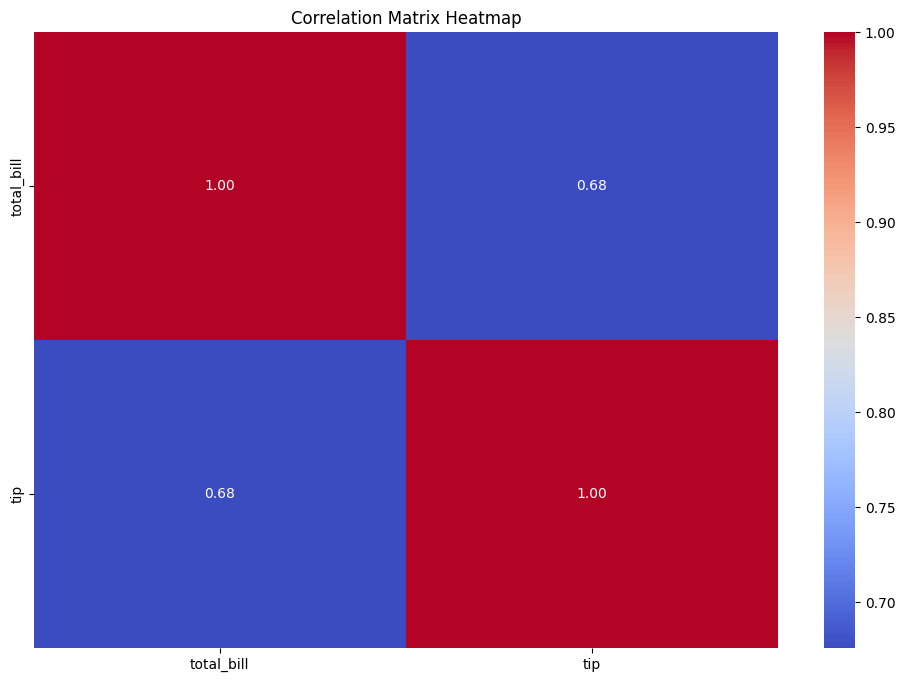

In [171]:
correlation_matrix = a.corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()